## **Análisis de datos con python**
Aprenderemos el proceso de analisis de datos en python utilizando datos de ventas de Walmart.

El objetivo es encontrar relación entre las ventas y las variables dadas, de tal forma que podamos ayudar en la toma de decisiones.

#### Librerias y datos

In [4]:
# Librerias
#pip install kagglehub
import pandas as pd
import numpy as np
import kagglehub

# Establecemos el formato de los resultados numericos
pd.set_option('display.float_format', '{:,.2f}'.format)

In [5]:
# Descargamos datos
path = kagglehub.dataset_download("mikhail1681/walmart-sales")
print("Ruta del dataset:", path)

Ruta del dataset: C:\Users\herbe\.cache\kagglehub\datasets\mikhail1681\walmart-sales\versions\2


In [6]:
# Cargamos datos
datos = pd.read_csv(path + '/Walmart_Sales.csv')

#### Exploración superficial y limpieza de datos
Con superficialmente nos referimos a revisar:

1. Número de variables y registros
2. El tipo de variable (fechas, texto, numericas)
3. Valores nulos
4. Visualizar algunos registros

> En este paso lo importante es conocer la estructura de nuestros datos y su integridad

In [7]:
# Numero de columnas, registros, nulos y tipo de datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
# Convertimos Date a variable de fecha
datos['Date'] = pd.to_datetime(datos['Date'],format="%d-%m-%Y")

In [9]:
# Revisamos primeros 5 registros del dataframe
datos.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,"1,643,690.90",0,42.31,2.57,211.10,8.11
1,1,2010-02-12,"1,641,957.44",1,38.51,2.55,211.24,8.11
2,1,2010-02-19,"1,611,968.17",0,39.93,2.51,211.29,8.11
3,1,2010-02-26,"1,409,727.59",0,46.63,2.56,211.32,8.11
4,1,2010-03-05,"1,554,806.68",0,46.50,2.62,211.35,8.11


#### **Exploración de datos**
Como buenos analistas de datos, algunas preguntas que quisieramos contestar son las siguientes:
1. ¿La fecha o temporada se relaciona con las ventas?
2. ¿Hay algún efecto en las ventas durante las fechas festivas?
3. ¿Existe relación entre las ventas y la temperatura, precio del combustible, CPI y tasa de desempleo?
4. ¿Hay alguna tienda (store) con algún comportamiento relevante (baja en las ventas o viceversa)?

##### ¿La fecha o temporada se relaciona con las ventas?

In [10]:
# Ventas mensuales totales
datos['fecha_mes'] = datos['Date'].dt.to_period('M').astype(str)

# Agrupamos ventas por fecha mes
ventas_mensuales = datos.groupby('fecha_mes')['Weekly_Sales'].sum().reset_index()
ventas_mensuales = ventas_mensuales.rename(columns={'Weekly_Sales':'ventas'})
 
# Como las ventas totales son muy elevadas, convertimos los totales a ventas en millones
ventas_mensuales['ventas_millones'] = np.round(ventas_mensuales['ventas']/1000000,2)

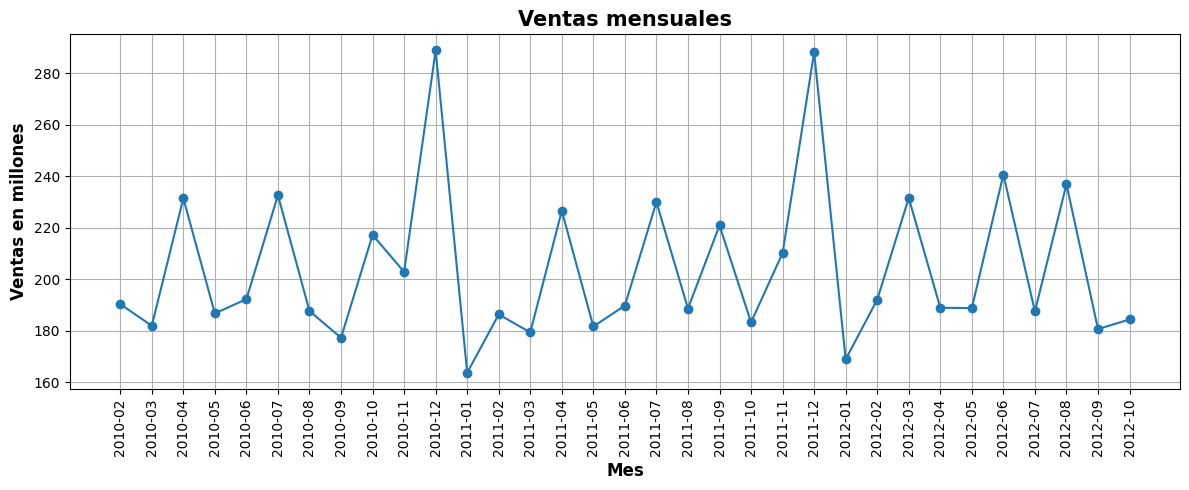

In [11]:
# Graficar las ventas mensuales
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(ventas_mensuales['fecha_mes'], ventas_mensuales['ventas_millones'], marker='o', label='Ventas mensuales')
plt.title('Ventas mensuales', fontsize=15,fontweight='bold')
plt.xlabel('Mes', fontsize=12,fontweight='bold')
plt.ylabel('Ventas en millones', fontsize=12,fontweight='bold')
plt.xticks(rotation=90)  # Rotar etiquetas en el eje x
plt.grid(True)
#plt.legend()
plt.tight_layout()
plt.show()

##### ¿Hay algún efecto en las ventas durante las fechas festivas?

In [12]:
# Ventas promedio
holiday_mean_sales = datos[datos['Holiday_Flag']==1]['Weekly_Sales'].mean()
notHoliday_mean_sales = datos[datos['Holiday_Flag']==0]['Weekly_Sales'].mean()

print('Ventas promedio durante dias festivos:',round(holiday_mean_sales))
print('Ventas promedio durante dias sin festividad:',round(notHoliday_mean_sales))
print('En promedio, las ventas en dias festivos son un', round(holiday_mean_sales/notHoliday_mean_sales - 1,2),'mayores')

Ventas promedio durante dias festivos: 1122888
Ventas promedio durante dias sin festividad: 1041256
En promedio, las ventas en dias festivos son un 0.08 mayores


##### ¿Existe relación entre las ventas y la temperatura, precio del combustible, CPI y tasa de desempleo?

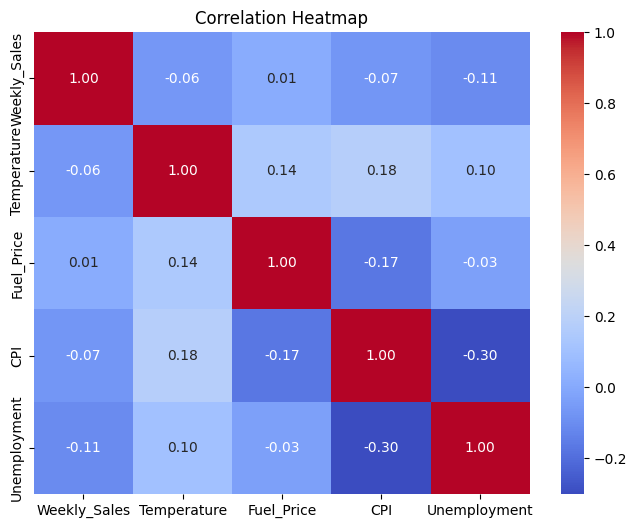

In [14]:
# Matriz de correlacion
import seaborn as sns

variables = ['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']
matriz_cor = datos[variables].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_cor, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [22]:
# Segmentamos variables y analizamos ventas promedio
datos['cat_Unemployment'] = pd.qcut(datos['Unemployment'],10)
datos.groupby('cat_Unemployment')['Weekly_Sales'].mean().reset_index()

C:\Users\herbe\AppData\Local\Temp\ipykernel_13092\2385006530.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos.groupby('cat_Unemployment')['Weekly_Sales'].mean().reset_index()


,cat_Unemployment,Weekly_Sales
0,"(3.878, 6.061]","1,153,126.83"
1,"(6.061, 6.623]","856,490.67"
2,"(6.623, 7.139]","1,109,046.00"
3,"(7.139, 7.545]","1,167,299.22"
4,"(7.545, 7.874]","1,104,074.79"
5,"(7.874, 8.185]","1,162,252.86"
6,"(8.185, 8.476]","1,059,020.31"
7,"(8.476, 8.876]","1,108,731.28"
8,"(8.876, 9.863]","920,337.37"
9,"(9.863, 14.313]","835,657.58"


##### ¿Hay alguna tienda (store) con algún comportamiento relevante (bajón en ventas o viceversa)?

In [19]:
numTiendas = datos['Store'].nunique()
print('Existen',numTiendas,'distintas')

Existen 45 distintas


In [43]:
# Ventas 2011 vs 2012 por sucursal
# Como 2012 solo tiene 10 meses, usaremos 10 meses de 2011 igualmente
ventas2011 = datos[(datos['Date'] >= '20110101') & (datos['Date'] <= '20111031')]
ventas2012 = datos[(datos['Date'] >= '20120101') & (datos['Date'] <= '20121031')]

# Agrupamos ventas por sucursal
ventas2011_Store = ventas2011.groupby('Store')['Weekly_Sales'].sum().reset_index()
ventas2011_Store = ventas2011_Store.rename(columns={'Weekly_Sales':'Ventas2011'})

ventas2012_Store = ventas2012.groupby('Store')['Weekly_Sales'].sum().reset_index()
ventas2012_Store = ventas2012_Store.rename(columns={'Weekly_Sales':'Ventas2012'})

# Unimos en un dataframe
ventas_Store = pd.merge(ventas2011_Store,ventas2012_Store,on='Store',how='left')

# Calculamos porcentaje de aumento año vs año
ventas_Store['ptg_aumento'] = (ventas_Store['Ventas2012'] - ventas_Store['Ventas2011']) / ventas_Store['Ventas2011']

In [45]:
# Top 5 tiendas con mayor aumento en ventas
ventas_Store.sort_values(by='ptg_aumento',ascending=False).head(5)

,Store,Ventas2011,Ventas2012,ptg_aumento
37,38,16293630.30,18631073.45,0.143457
43,44,12719268.57,14187373.72,0.115424
38,39,59419916.86,65885662.85,0.108814
2,3,16580098.11,18024439.50,0.087113
4,5,13058039.83,14168838.13,0.085066


In [44]:
# Top 5 tiendas con mayor decremento en ventas
ventas_Store.sort_values(by='ptg_aumento',ascending=True).head(5)

,Store,Ventas2011,Ventas2012,ptg_aumento
35,36,16105178.75,13286470.53,-0.175019
13,14,84694723.98,77441398.26,-0.085641
20,21,31846447.79,30251886.71,-0.050070
26,27,73855571.74,71920056.12,-0.026207
14,15,25264056.33,24827530.71,-0.017279
